# Sexual Violence: A Story Through Data

The world's conversation around sexual assault, domestic violence, and related topics is changing rapidly. ***What is a the reality of sexual assault in the U.S.A and globally?***

*Note:* There is a lot of terms that can be used to describe sexual violence: this includes rape, sexual assault, violence against women, domestic violence, and intimate partner violence. To better clarify data, each visualization will credit the data source and how the owning organization defines the violence. 

## By The Numbers...

### 1. WHO Non-Partner Sexual Violence

[The World Health Association (WHO)](https://www.who.int/) provides a variety of publicly available data in the [Global Health Observatory data repository](http://apps.who.int/gho/data/node.home). The first data source we ae going to look at to understand sexual violence is [Non-partner sexual violence prevalence: Data by WHO income region](http://apps.who.int/gho/data/node.main.NPSV?lang=en). Non-partner means "strangers, acquaintances, friends, colleagues, peers, teachers, neighbours and family members" and sexual violence is an umbrella term for any type of sexual violence. This data was gathered on women ages 15-69 in 2010. 

In [1]:
# import libraries needed for entire Jupyter Notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# reading csv file for WHO Non-Partner Sexual Violence 
who1 = pd.read_csv("./datasources/WHO-nonpartnerviolence.csv") 
# clean up the table by taking columns
who1.drop(who1.columns.difference(['WHOINCOMEREGION (DISPLAY)','Numeric', 'Low', 'High']), 1, inplace=True)
who1 = who1.rename(columns={'WHOINCOMEREGION (DISPLAY)': 'Region'})
who1 = who1.dropna()
print(who1)

                                              Region   Numeric      Low  \
1  Low- and middle-income countries of the Europe...   5.24759  0.77092   
2  Low- and middle-income countries of the South-...   4.94191  0.97722   
3  Low- and middle-income countries of the Wester...   6.81255  1.67485   
4              High-income countries for all regions  12.58295  8.92547   
5  Low- and middle-income countries of the Africa...  11.91790  8.52057   
6   Low- and middle-income countries of the Americas  10.69660  7.01617   
7                                              World   7.17237  5.25120   

       High  
1   9.72426  
2   8.90660  
3  11.95026  
4  16.24044  
5  15.31522  
6  14.37702  
7   9.09353  


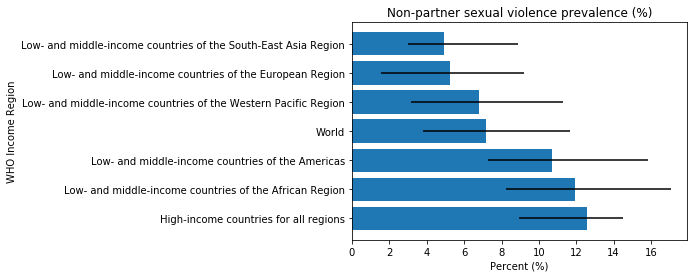

In [2]:
# sort from largest prevalance 
who1 = who1.sort_values(by='Numeric', ascending=False).reset_index(drop=True)

# represent this data as a bar graph which show the high, low, and numeric value
who1['low_diff'] = who1['Numeric'] - who1['Low']
who1['high_diff'] = who1['High'] - who1['Numeric'] 
err = who1[['low_diff','high_diff']].to_numpy().reshape(2,7)
plt.barh(tick_label=who1.Region, width=who1.Numeric, y=list(who1.index) , xerr=err)
plt.title('Non-partner sexual violence prevalence (%)')
plt.ylabel('WHO Income Region')
plt.xlabel('Percent (%)')
plt.show()

This data, which compares the prevalance of non-partner sexual violence in low- and middle-income regions to the general world and high-income regions, reveals the shocking scale of sexual violence. **On average, globally, about 7% of women could be a victim of sexual violence from a non-partner**.

*Note:* This data may be inaccaurate depending on how often victims actually report violence to their governing bodies. 